In [1]:
import sys
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install pyyaml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install isoweek
import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("DB_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))
ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))
print(accounts)
# counter for figures
counter = 0
browser_freq = 0
browser_infreq = 0

/Users/drewgregory/JupyterNotebooks/habitlab-data-analysis
[{'_id': '0744f7e9f4323685b86a1522b101550c9415ba2488d7e77649b3f21f2adc0d3f', 'android': ['9cb8c59eabbb60ad6447345c'], 'browser': []}, {'_id': 'e8493f5e2cc89f1ca9328c889763125a1a117bd0e8f4e428100450f9da987006', 'android': ['b219926d16e6e46fa426cafd'], 'browser': []}, {'_id': '739e11589479d8e6b88aec1b86ec8c4a023691db6c9d0aab05a4b3a508b0e2db', 'android': ['U1532437453047928'], 'browser': []}, {'_id': 'c3e36aee683e96002d1441743cf8580ebe5e4916e76c049a97c89422b69477fd', 'android': ['010cf6179f52b3d62184ee17'], 'browser': []}, {'_id': 'd0ed3649a5a7e59e6314bcf67879e6ede0376a2a85736382fdf157a0ae2efd33', 'android': ['0b0d1da5c036cb9637aff5d5'], 'browser': []}, {'_id': 'c09060490d493d24c53f6741c911bd4b55c1a57fa157e89c24c8ee566dbec273', 'android': ['f6c5e87bbe828ffc4278d4b7'], 'browser': []}, {'_id': '1a59ec7d9cd85320e025638f99736d66cc997dbe3ee1755d270b2421feefd904', 'android': ['38a4b3e06ead18a13442f5a7'], 'browser': []}, {'_id': 'd1357b1

In [55]:
ANDROID = "android"
BROWSER = "browser" # habitlab goal, i.e. facebook/spend_less_time or custom/spend_less_time_developers.slashdot.org
BROWSER_DOMAIN = "browser_domain"
SHARED = "shared"
PACKAGES = "packages"
from datetime import date, datetime
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
# Associate users with domain name which will function as our key.
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['www', 'aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def organize_stats(shared_goals, stats, device, counts, user_id):
    """
    Organizes that stats object into shared_goals for device.
    @param shared_goals: dictionary
    @param stats:  stats object returned from freq_stats
    @param device: ANDROID or BROWSER
    """
    for iso in stats:
        for freq in stats[iso]:
            for goal in stats[iso][freq]:
                name = get_name(goal, device)
                if name not in shared_goals:
                    shared_goals[name] = {ANDROID: {PACKAGES:set[]} , BROWSER: {PACKAGES:[]} }
                if goal not in shared_goals[name][device][PACKAGES]:
                    shared_goals[name][device][PACKAGES].append(goal)
                    shared_goals[name][device][goal] = {}
                if iso not in shared_goals[name][device][goal]:
                    shared_goals[name][device][goal][iso] = freq
                    if device == BROWSER:
                        counts[freq] += 1
                # Before I submitted the update, some apps under the same name wouldn't have the same freq setting.
                elif shared_goals[name][device][goal][iso] != freq:
                    shared_goals[name][device][goal][iso] = "both"
                    counts["both"] += 1
                if len(shared_goals[name][ANDROID][PACKAGES]) > 0 and len(shared_goals[name][BROWSER][PACKAGES]) > 0:
                    shared_goals[SHARED].add(name)

def store_iso_freq_settings(shared_goals, user):
    """
    Stores the browser iso frequency settings for the user in shared_goals
    :param user user id
    :param shared_goals {name: {device: {goal: {iso: "freq"}}}}
    """
    for setting in ext_db[user+"_synced:goal_frequencies"].find({"val": {"algorithm": "isoweek_random"}}):
        first_iso = setting["timestamp_local"]

In [100]:
# Analyze conservation across devices
shared_data = {}
counts = {"freq" : 0, "infreq": 0,  'both' :0}

num_shared_goals = 0
for account in accounts:
    shared_goals = {SHARED: set([])}
    if len(account[ANDROID]) > 0 and len(account[BROWSER]) > 0: # It's possible they have overlapping goals.
        for user in account[ANDROID]:
            stats = json.loads(req.urlopen("http://localhost:5000/freq_stats_for_user?id="+user).read().decode("utf-8"))
            organize_stats(shared_goals, stats, ANDROID, counts, user)
        for user in account[BROWSER]:
            store_iso_freq_settings(shared_goals, user)
        if len(shared_goals[SHARED]) > 0:
            shared_data[account['_id']] = shared_goals
            num_shared_goals += len(shared_goals[SHARED])

In [4]:
print(str(counts))

{'freq': 750, 'infreq': 668, 'both': 183}


In [5]:
# count how many freq vs. in freq things there are in shared_data
device_freq = {"android": {"freq" : 0, "infreq": 0, "both": 0},  "browser": {"freq":  0, "infreq": 0, "both": 0}}
for account in shared_data:
    for goal in shared_data[account]:
        if goal != "shared": 
            for device in shared_data[account][goal]:
                for package in shared_data[account][goal][device]:
                    if package != "packages":
                        for week in shared_data[account][goal][device][package]:
                            device_freq[device][shared_data[account][goal][device][package][week]] += 1
print(device_freq)
#Hmmmm... android looks okay, but big imbalance between freq/infreq browser

{'android': {'freq': 396, 'infreq': 326, 'both': 28}, 'browser': {'freq': 478, 'infreq': 484, 'both': 59}}


In [6]:
# Let's see what browser names there are
browser_names = set([])
for account in shared_data:
    for goal in shared_data[account]:
        if BROWSER in shared_data[account][goal]:
            if len(shared_data[account][goal][BROWSER]["packages"]) > 1:
                browser_names.add(goal + " " + str(shared_data[account][goal][BROWSER]))

{"amazon {'packages': ['custom/spend_less_time_www.amazon.in', 'amazon/spend_less_time'], 'custom/spend_less_time_www.amazon.in': {'33': 'freq', '34': 'freq', '35': 'infreq', '36': 'freq'}, 'amazon/spend_less_time': {'33': 'infreq', '34': 'freq', '35': 'freq', '36': 'freq'}}", "playpcesor {'packages': ['custom/spend_less_time_playpcesor.com', 'custom/spend_less_time_www.playpcesor.com'], 'custom/spend_less_time_playpcesor.com': {'34': 'freq', '35': 'infreq', '36': 'infreq'}, 'custom/spend_less_time_www.playpcesor.com': {'34': 'infreq', '35': 'freq', '36': 'freq'}}", "yahoo {'packages': ['custom/spend_less_time_mail.yahoo.com', 'custom/spend_less_time_yahoo'], 'custom/spend_less_time_mail.yahoo.com': {'34': 'infreq', '35': 'infreq', '36': 'infreq'}, 'custom/spend_less_time_yahoo': {'34': 'infreq', '35': 'freq', '36': 'infreq'}}", "nytimes {'packages': ['custom/spend_less_time_nytimes.com', 'custom/spend_less_time_www.nytimes.com'], 'custom/spend_less_time_nytimes.com': {'33': 'freq', '3

In [49]:
def get_iso_for_week(iso_week, account, shared_data, goal):
    """
    Gets browser and android frequency settings for a given goal, week, and account.
    :account email hash
    :goal get_name return of package
    :shared_data {email_hash: 'shared': {set of shared goals}, goal: {device: {'packages': [], package: {isoWeek: 'freq' or 'infreq'}}}}
    :return (browser frequency -> "freq" or "infreq", android frequency -> "freq" or "infreq"); if no freq found None
    """
    # First, get browser package
    if goal not in shared_data[account]:
        return None
        
    browser_goal_packages = shared_data[account][goal][BROWSER][PACKAGES]
    browser_freq = None
    for package in browser_goal_packages:
        if not browser_freq:
            for iso in shared_data[account][goal][BROWSER][package]:
                if str(iso) == str(iso_week):
                    browser_freq = shared_data[account][goal][BROWSER][package][iso]
                    break
    if not browser_freq:
        return None
    # Next get Android packages
    android_goal_packages = shared_data[account][goal][ANDROID][PACKAGES]
    android_freq = None
    for package in android_goal_packages:
        if not android_freq:
            for iso in shared_data[account][goal][ANDROID][package]:
                if str(iso) == str(iso_week):
                    android_freq = shared_data[account][goal][ANDROID][package][iso]
                    break
    if not android_freq:
        return None
    return (browser_freq, android_freq)


In [117]:
from isoweek import Week
from datetime import date, datetime
import moment
import math
from time_utils import epoch_to_date
# Now, the goal is to get the daily time spent on these special domains.
# Goal: [{"goal": "", "device": "android", frequent": true, "email_hash": "", "other_device_freq": true}]
OTHER_FREQUENCY = "other_frequency"
TIME = "time"
device_freq = {"android": {"freq" : 0, "infreq": 0, "both": 0},  "browser": {"freq":  0, "infreq": 0, "both": 0}}
day_spent_shared_domain_stats = []
for account in shared_data:
    print(account)
    # The browser data is already there, so let's fetch it.
    domain_freq_day_time = {BROWSER: {}, ANDROID: {}}
    for user in db['email_to_user'].find({'_id': account})[0][BROWSER]:
        for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find():
            goal = get_name(day_stat['key'], BROWSER_DOMAIN)
            # print(shared_data[account][SHARED])
            if goal in shared_data[account][SHARED]: # It can be a data point.
                # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
                # We need to instead build day string from moment
                day = epoch_to_date(int(day_stat['key2']))
                # weirdly enough, datetime timestamps are seconds, not ms.
                isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch()+ 8*60*60).isocalendar()[1])
                # Now, we need to hope that all the packages the user is using under that goal name is in 
                # same freq/infreq setting.
                freq_settings = get_iso_for_week(isoWeek, account, shared_data, goal)
                if freq_settings:
                    print(day)
                    print(moment.date(day).epoch())
                    print(str(datetime.fromtimestamp(moment.date(day).epoch()+ 8*60*60)))
                    (browser_freq, android_freq) = freq_settings
                    # YES WE HAVE ALL THE DATAS FOR A POINT
                    if goal not in domain_freq_day_time[BROWSER]:
                        domain_freq_day_time[BROWSER][goal] = {}
                    if browser_freq not in domain_freq_day_time[BROWSER][goal]:
                        domain_freq_day_time[BROWSER][goal][browser_freq] = {}
                    if day not in domain_freq_day_time[BROWSER][goal][browser_freq]:
                        domain_freq_day_time[BROWSER][goal][browser_freq][day] = {}
                    day_obj = domain_freq_day_time[BROWSER][goal][browser_freq][day]
                    day_obj[OTHER_FREQUENCY] = android_freq
                    #if OTHER_FREQUENCY not in day_obj:
                    #    day_obj[OTHER_FREQUENCY] = android_freq
                    if TIME not in day_obj or math.log(day_stat['val']) > day_obj[TIME]:
                        # we want the final update of time spent for that day on that domain.
                        day_obj[TIME] = (math.log(day_stat['val']))
   
    # PHEW WE GOT THRU IT ALL. Now let's add the valid data points to the array!

    for device in domain_freq_day_time:
        for goal in domain_freq_day_time[device]:
            for freq in domain_freq_day_time[device][goal]:
                for day in domain_freq_day_time[device][goal][freq]:
                    day_obj = domain_freq_day_time[device][goal][freq][day]
                    device_freq[device][freq] += 1
                    obj = {"goal": goal, "device": device, "frequent": freq, "email_hash": account,
                          "other_device_freq": day_obj[OTHER_FREQUENCY], "duration":day_obj[TIME], "day": day}
                    day_spent_shared_domain_stats.append(obj)

8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25


1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
201

2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 01:00:00
2018-08-06
1533513600
2018-08-06 0

2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
153

2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-13
153

2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
153

2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 0

1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
201

2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 0

2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
153

2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 0

2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
153

1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
201

2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
153

1535068800
2018-08-24 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4

2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 0

1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
201

2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-07
1533600000
2018-08-07 01:00:00
2018-08-08
1533686400
2018-08-08 0

2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
1533859200
2018-08-10 01:00:00
2018-08-10
153

1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
201

2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 0

1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-08
1533686400
2018-08-08 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
2018-08-09
1533772800
2018-08-09 01:00:00
201

2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
153

2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
153

18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11
1533945600
2018-08-11 01:00:00
2018-08-11


2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 0

2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 01:00:00
2018-08-17
1534464000
2018-08-17 0

2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
153

2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 0

2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 0

2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
153

2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
2018-08-26
1535241600
2018-08-26 01:00:00
5020af425bb84dc614b9df4e0ccf54be14d4429ee9d219d8f9c9b494179db39b
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-13
1534118400
2018-08-13 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 01:00:00
2018-08-14
1534204800
2018-08-14 

2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
1534377600
2018-08-16 01:00:00
2018-08-16
153

1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
2018-08-19
1534636800
2018-08-19 01:00:00
de0dd7052a011dc3bcc707915f634f83f12ad8bea77c3

2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 01:00:00
2018-08-15
1534291200
2018-08-15 0

2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 01:00:00
2018-08-18
1534550400
2018-08-18 0

1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
201

1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
201

2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 0

2018-08-24 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
c7b6e0ab1fc1eeda5b49833d2e581d6988c7038f423ceff758b3f46d8487527e
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 

2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 0

2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-20
1534723200
2018-08-20 0

2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
153

2018-08-20
1534723200
2018-08-20 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-21
1534809600
2018-08-21 01:00:00
2018-08-22
1534896000
2018-08-22 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 0

2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 0

2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-23
1534982400
2018-08-23 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
153

2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 01:00:00
2018-08-25
1535155200
2018-08-25 0

2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
1535068800
2018-08-24 01:00:00
2018-08-24
153

In [118]:
# Now do this for Android!
for account in shared_data:
    # The browser data is already there, so let's fetch it.
    domain_freq_day_time = {BROWSER: {}, ANDROID: {}}
    for user in db['email_to_user'].find({'_id': account})[0][ANDROID]: 
        for s in db[user + '_sessions'].find():
            goal = get_name(s['domain'], ANDROID)
            if goal in shared_data[account][SHARED]: 
                # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
                # We need to instead build day string from moment
                time = moment.unix(s["timestamp"])
                day = time.format("YYYY-MM-DD")
                # weirdly enough, datetime timestamps are seconds, not ms.
                isoWeek = str(datetime.fromtimestamp(s["timestamp"]/1000).isocalendar()[1]) 
                # Now, we need to hope that all the packages the user is using under that goal name is in 
                # same freq/infreq setting.
                freq_settings = get_iso_for_week(isoWeek, account, shared_data, goal)
                if freq_settings:
                    (browser_freq, android_freq) = freq_settings
                    # YES WE HAVE ALL THE DATAS FOR A POINT
                    if goal not in domain_freq_day_time[ANDROID]:
                        domain_freq_day_time[ANDROID][goal] = {}
                    if android_freq not in domain_freq_day_time[ANDROID][goal]:
                        domain_freq_day_time[ANDROID][goal][android_freq] = {}
                    if day not in domain_freq_day_time[ANDROID][goal][android_freq]:
                        domain_freq_day_time[ANDROID][goal][android_freq][day] = {}
                    day_obj = domain_freq_day_time[ANDROID][goal][android_freq][day]
                    if TIME not in day_obj:
                        # we want the final update of time spent for that day on that domain.
                        day_obj[TIME] = (s['duration'])
                    else:
                        day_obj[TIME] += s["duration"]
                    day_obj[OTHER_FREQUENCY] = browser_freq
                    #if OTHER_FREQUENCY not in day_obj:
                    #    day_obj[OTHER_FREQUENCY] = browser_freq
                    

    # PHEW WE GOT THRU IT ALL. Now let's add the valid data points to the array!
    for device in domain_freq_day_time:
        for goal in domain_freq_day_time[device]:
            for freq in domain_freq_day_time[device][goal]:
                for day in domain_freq_day_time[device][goal][freq]:
                    day_obj = domain_freq_day_time[device][goal][freq][day]
                    device_freq[device][freq] += 1
                    if OTHER_FREQUENCY in day_obj and TIME in day_obj and day_obj[TIME] > 0:
                        obj = {"goal": goal, "device": device, "frequent": freq, "email_hash": account,
                              "other_device_freq": day_obj[OTHER_FREQUENCY], "duration":math.log(day_obj[TIME]), "day": day}
                        day_spent_shared_domain_stats.append(obj)

In [119]:
print(len(day_spent_shared_domain_stats))
print(device_freq)

1198
{'android': {'freq': 390, 'infreq': 276, 'both': 42}, 'browser': {'freq': 210, 'infreq': 219, 'both': 62}}


In [120]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython
import pandas as pd
import json

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [121]:
# Figure out which goal-user pairs have at least one freq/infreq setting each
good_pairs = {}
freq_settings_for_each_goal = {}
for day in day_spent_shared_domain_stats:
    email = day["email_hash"]
    if email not in freq_settings_for_each_goal:
        freq_settings_for_each_goal[email] = {ANDROID: {}, BROWSER: {}}
    frequency = day["frequent"]
    goal = day["goal"]
    device = day["device"]
    if goal not in freq_settings_for_each_goal[email][device]:
        freq_settings_for_each_goal[email][device][goal] = frequency
    elif freq_settings_for_each_goal[email][device][goal] != frequency:
        # YAY! We have enough data such that the user has alternated frequency for that goal
        if email not in good_pairs:
            good_pairs[email] = set([])
        good_pairs[email].add(goal)
print(good_pairs)

{'b5843eadda18a08ec20d16d92370cc304849efac4f201d820399339f6683a64c': {'reddit', 'facebook'}, 'b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486': {'youtube', 'plurk', 'facebook'}, '06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5': {'facebook', 'twitter'}, 'b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4e0685175edb3f9be9b4': {'youtube', 'facebook'}, 'fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208': {'youtube', 'facebook'}, 'dca7176c2160640b98afdf855ad996744f5068d038e29ffbae20e8121cca915e': {'facebook', 'gmail'}, '18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5': {'youtube'}, '735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e': {'facebook'}, '6770004d8a1c4327f5e00ee41bf6b7a42ed1c745bc94f0ed76456788ba49bad5': {'youtube', 'facebook', 'twitter'}, '7e07decdc83c46abafeb5eaa5ed287259968ff4be2c3cbf10e17b3bd2660918c': {'netflix', 'facebook'}, 'c7b9f45a51195d35acef7469c85b7ad1fb012b099eeb9c30adb883ce81eb68e9': {'faceb

In [170]:
# Put this into data frame
# precondition: day_spent_shared_domain_stats has at least one data point.
data_frame_dict = { key: [] for key in day_spent_shared_domain_stats[0] }
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
for item in day_spent_shared_domain_stats:
    if item['frequent'] != 'both' and item["other_device_freq"] != "both" and item["device"] == BROWSER:# and \
        #item['email_hash'] in good_pairs and item["goal"] in good_pairs[item["email_hash"]]:
        if item['device'] not in field_stats:
            field_stats[item['device']] = {}
        if item["frequent"] not in field_stats[item['device']]:
            field_stats[item['device']][item["frequent"]] = 1
        else:
            field_stats[item['device']][item["frequent"]] += 1
        for key in item:
            data_frame_dict[key].append(item[key])
df = pd.DataFrame(data_frame_dict)
df.to_csv("cross_device_comp.csv")


In [171]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
print(df)
#library(ez)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


         goal  device frequent
0     youtube browser     freq
1     youtube browser     freq
2     youtube browser     freq
3    facebook browser     freq
4    facebook browser     freq
5    facebook browser     freq
6    facebook browser     freq
7     youtube browser   infreq
8     youtube browser   infreq
9     youtube browser   infreq
10   facebook browser   infreq
11   facebook browser   infreq
12   facebook browser   infreq
13   facebook browser   infreq
14   facebook browser     freq
15   facebook browser     freq
16   facebook browser     freq
17   facebook browser     freq
18   facebook browser     freq
19   facebook browser     freq
20   facebook browser   infreq
21   facebook browser   infreq
22   facebook browser   infreq
23   facebook browser   infreq
24   facebook browser   infreq
25     reddit browser     freq
26     reddit browser     freq
27     reddit browser     freq
28     reddit browser     freq
29     reddit browser     freq
30     reddit browser     freq
31   fac

In [172]:
print(day_spent_shared_domain_stats)

[{'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.318968113746434, 'day': '2018-08-21'}, {'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.180016653652572, 'day': '2018-08-22'}, {'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.6895992691789665, 'day': '2018-08-25'}, {'goal': 'facebook', 'device': 'browser', 'frequent': 'freq', 'email_hash': '539415565b33813048d7234428a44584980fce57d21ebc622931fc04ff504fbe', 'other_device_freq': 'infreq', 'duration': 2.0794415416798357, 'day': '2018-08-15'}, {'goal': 'facebook', 'device': 'browser', 'frequent': 'freq', 'email_hash': '539415565b3

both freq 168
android freq/brwoser infreq189
android infreq/browser freq136
both infreq 292
6.574721035148683


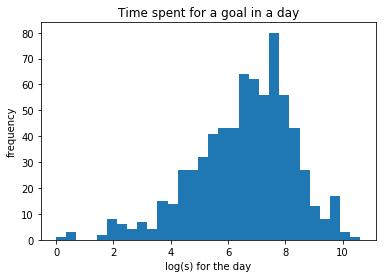

In [173]:
import matplotlib.pyplot as pyplot
import math
counter += 1
pyplot.figure(counter)
print("both freq " + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "freq" and day["other_device_freq"] == "freq"])))
print("android freq/brwoser infreq"  + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "freq" and day["other_device_freq"] == "infreq"])))
print("android infreq/browser freq" + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "infreq" and day["other_device_freq"] == "freq"])))
print("both infreq " + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["frequent"] == "freq" and day["other_device_freq"] == "freq"])))
durations = [(day['duration']) for day in day_spent_shared_domain_stats if day["device"]  == ANDROID]
pyplot.xlabel("log(s) for the day")
pyplot.ylabel("frequency")
pyplot.title("Time spent for a goal in a day")
pyplot.hist(durations, bins=30)
import statistics
print(statistics.mean(durations))

In [174]:
%%R -i df -w 5 -h 5 --units in -r 200

df$frequent <- factor(df$frequent, levels=c("infreq", "freq"), ordered=FALSE)
df$device <- factor(df$device, levels=c("browser", "android"), ordered=FALSE)
df$other_device_freq <- factor(df$other_device_freq, levels=c("infreq", "freq"), ordered=FALSE)
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
summary(df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


     goal               device      frequent  
 Length:417         browser:417   infreq:214  
 Class :character   android:  0   freq  :203  
 Mode  :character                             
                                              
                                              
                                              
                                              
                                                            email_hash 
 b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486: 38  
 6770004d8a1c4327f5e00ee41bf6b7a42ed1c745bc94f0ed76456788ba49bad5: 24  
 dca7176c2160640b98afdf855ad996744f5068d038e29ffbae20e8121cca915e: 24  
 06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5: 20  
 4f58ed3ff5bec642352803392d9bf860d500cacbcc3a6417c16e47fbaaf788dc: 17  
 b5843eadda18a08ec20d16d92370cc304849efac4f201d820399339f6683a64c: 17  
 (Other)                                                         :277  
 other_device_freq    duration         day      

In [177]:
%%R -i df -w 5 -h 5 --units in -r 200


# SIGNIFCANT: does the frequency have an effect on duration, controlling for user and goal?
df$frequent <- factor(df$frequent, levels=c("infreq", "freq"), ordered=FALSE)
# df$device <- factor(df$device, levels=c("browser", "android"), ordered=FALSE)
df$other_device_freq <- factor(df$other_device_freq, levels=c("infreq", "freq"), ordered=FALSE)
df$email_hash <- factor(df$email_hash,  ordered=FALSE)

results <- lmer(duration ~ (other_device_freq) + (frequent) + (other_device_freq):(frequent)  + (1|email_hash) + (1|goal) + (1|day) , data = df)

resultsnull <- lmer(duration ~  (1|email_hash) + (1|goal), data = df)

#results <- lmer(duration ~ (1|other_device_freq) + (1|frequent) + (1|email_hash) + (1|goal) + (1|day) + (1|device), data = df)

# results <- lmer(duration ~ other_device_freq*device + (1|frequent) + (1|email_hash), data = df)

show(results)
# sjp.lmer(results)
show(ranef(results))
show(fixef(results))
summary(results)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML ['lmerModLmerTest']
Formula: 
duration ~ (other_device_freq) + (frequent) + (other_device_freq):(frequent) +  
    (1 | email_hash) + (1 | goal) + (1 | day)
   Data: df
REML criterion at convergence: 1518.502
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 1.0642  
 day        (Intercept) 0.0000  
 goal       (Intercept) 0.7705  
 Residual               1.3289  
Number of obs: 417, groups:  email_hash, 51; day, 21; goal, 15
Fixed Effects:
                       (Intercept)               other_device_freqfreq  
                            5.5931                             -0.1767  
                      frequentfreq  other_device_freqfreq:frequentfreq  
                           -0.5960                              0.6216  
$email_hash
                                                                  (Intercept)
06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5 -1.639268955
0b499f07b93ec4b3e4958f91406e3bae276f33ef9

In [176]:
print(str(field_stats))

{'browser': {'freq': 203, 'infreq': 214}}


In [129]:
# Next, let's implement Michael's test.
# First, we need aggregate time spent across devices for a certain goal.
BROWSER_FREQ = "browser_freq"
ANDROID_FREQ = "android_freq"
agg_stat = {}
for item in day_spent_shared_domain_stats:
    email = item["email_hash"]
    if email not in agg_stat:
        agg_stat[email] = {}
    date = item["day"]
    goal = item["goal"]
    if goal not in agg_stat[email]:
        agg_stat[email][goal] = {}
    if date not in agg_stat[email][goal]:
        agg_stat[email][goal][date] = {}
    if BROWSER_FREQ not in agg_stat[email][goal][date]:
        if item["device"] == BROWSER:
            agg_stat[email][goal][date][BROWSER_FREQ] = item["frequent"]
            agg_stat[email][goal][date][ANDROID_FREQ] = item["other_device_freq"]
        else:
            agg_stat[email][goal][date][BROWSER_FREQ] = item["other_device_freq"]
            agg_stat[email][goal][date][ANDROID_FREQ] = item["frequent"]
    if "duration" not in agg_stat[email][goal][date]:
        agg_stat[email][goal][date]["duration"] = item["duration"]
    else:
        agg_stat[email][goal][date]["duration"] += item["duration"]

In [130]:
agg_stat_list = []
for email in agg_stat:
    for goal in agg_stat[email]:        
        for date in agg_stat[email][goal]:
            obj = agg_stat[email][goal][date]
            agg_stat_list.append({"duration": obj["duration"], BROWSER_FREQ: obj[BROWSER_FREQ], ANDROID_FREQ: obj[ANDROID_FREQ],
                                 "email_hash": email, "goal": goal})

In [131]:
"""
Linear mixed model fit by REML ['lmerMod']
Formula: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) +  
    (1 | goal) + (1 | device)
   Data: df
REML criterion at convergence: 1219.07
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 1.1805  
 goal       (Intercept) 0.0000  
 device     (Intercept) 0.6750  
 frequent   (Intercept) 0.2812  
 Residual               1.5227  
Number of obs: 316, groups:  email_hash, 29; goal, 9; device, 2; frequent, 2
Fixed Effects:
            (Intercept)  other_device_freqinfreq  
                 5.1227                   0.7823  
Data: df
Models:
resultsnull: duration ~ (1 | frequent) + (1 | email_hash) + (1 | goal) + (1 | 
resultsnull:     device)
results: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) + 
results:     (1 | goal) + (1 | device)
            Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
resultsnull  6 1241.6 1264.1 -614.78   1229.6                             
results      7 1232.4 1258.7 -609.21   1218.4 11.149      1  0.0008407 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
"""

"\nLinear mixed model fit by REML ['lmerMod']\nFormula: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) +  \n    (1 | goal) + (1 | device)\n   Data: df\nREML criterion at convergence: 1219.07\nRandom effects:\n Groups     Name        Std.Dev.\n email_hash (Intercept) 1.1805  \n goal       (Intercept) 0.0000  \n device     (Intercept) 0.6750  \n frequent   (Intercept) 0.2812  \n Residual               1.5227  \nNumber of obs: 316, groups:  email_hash, 29; goal, 9; device, 2; frequent, 2\nFixed Effects:\n            (Intercept)  other_device_freqinfreq  \n                 5.1227                   0.7823  \nData: df\nModels:\nresultsnull: duration ~ (1 | frequent) + (1 | email_hash) + (1 | goal) + (1 | \nresultsnull:     device)\nresults: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) + \nresults:     (1 | goal) + (1 | device)\n            Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    \nresultsnull  6 1241.6 1264.1 -614.78   1229.6       

In [132]:
data_frame_dict = { key: [] for key in agg_stat_list[0] }
for item in agg_stat_list:
    for key in item:
        data_frame_dict[key].append(item[key])

df = pd.DataFrame(data_frame_dict)


In [133]:
%%R -i df -w 5 -h 5 --units in -r 200

# SIGNIFCANT: does the frequency have an effect on duration, controlling for user and goal?

results <- lmer(duration ~ (android_freq) + (browser_freq) + (1|email_hash) + (1|goal) , data = df)

show(results)
summary(results)
show(anova(resultsnull, results))

Linear mixed model fit by REML ['lmerModLmerTest']
Formula: duration ~ (android_freq) + (browser_freq) + (1 | email_hash) +  
    (1 | goal)
   Data: df
REML criterion at convergence: 4363.097
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 1.829   
 goal       (Intercept) 1.646   
 Residual               3.193   
Number of obs: 825, groups:  email_hash, 57; goal, 16
Fixed Effects:
       (Intercept)    android_freqfreq  android_freqinfreq    browser_freqfreq  
            9.1707             -0.5578             -0.5441             -0.5408  
browser_freqinfreq  
           -0.4257
Error in anova.merMod(resultsnull, results) : 
  models were not all fitted to the same size of dataset


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in anova.merMod(resultsnull, results) : 
  models were not all fitted to the same size of dataset

  warnings.warn(x, RRuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/Library/Frameworks/Python.framework/Vers

In [134]:
"""
# Time on both

time ~ mobilecond desktopcond mobile * desktop
do two separate tests
"""


'\n# Time on both\n\ntime ~ mobilecond desktopcond mobile * desktop\ndo two separate tests\n'

In [135]:
# Now, let's see if the browser frequency settings affect Android usage
print(shared_data)

{'8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef': {'shared': {'youtube', 'facebook', 'gmail'}, 'chrome': {'android': {'packages': ['com.android.chrome'], 'com.android.chrome': {'32': 'freq', '33': 'both', '34': 'freq'}}, 'browser': {'packages': []}}, 'microsoft': {'android': {'packages': ['com.microsoft.office.outlook'], 'com.microsoft.office.outlook': {'32': 'infreq', '33': 'freq', '34': 'both'}}, 'browser': {'packages': []}}, 'youtube': {'android': {'packages': ['com.google.android.youtube'], 'com.google.android.youtube': {'33': 'infreq', '34': 'infreq'}}, 'browser': {'packages': ['youtube/spend_less_time'], 'youtube/spend_less_time': {'34': 'freq', '35': 'infreq', '36': 'freq'}}}, 'lineageos': {'android': {'packages': ['org.lineageos.jelly'], 'org.lineageos.jelly': {'33': 'freq'}}, 'browser': {'packages': []}}, 'messaging': {'android': {'packages': ['com.google.android.apps.messaging'], 'com.google.android.apps.messaging': {'33': 'freq'}}, 'browser': {'packages': 

In [149]:
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
BROWSER = "browser"
HASH = "email_hash"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
GOAL_TIME = "goal_time"
BROWSER_INTENSITY = "browser_intensity"
NUM_BROWSER_GOALS = "num_browser_goals"
android_days = [] 
for account in accounts:
    if account["_id"] in shared_data:
        for user in account[ANDROID]:
            curr_date = ""
            day_data = {NUM_BROWSER_GOALS: 0, BROWSER_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0 }
            for s in db[user+ "_sessions"].find({"enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
                time = moment.unix(s["timestamp"])
                date = time.format("YYYY-MM-DD")
                if date != curr_date:
                    if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[GOAL_TIME] > 0 and day_data[OTHER_TIME] > 0:
                        # Add obj and reset data
                        # take logs of time cuz time is log-norm distributed
                        for key in day_data:
                            if "time" in key:
                                day_data[key]= math.log(day_data[key])
                        # Now, goal is to get browser intensity
                        num_browser_goals = 0
                        num_freq_browser_goals = 0
                        isoWeek = str(datetime.fromtimestamp(s["timestamp"]/1000).isocalendar()[1]) 
                        for goal in shared_data[account["_id"]]:
                            if goal != "shared":
                                for package in shared_data[account["_id"]][goal][BROWSER][PACKAGES]:
                                    if isoWeek in shared_data[account["_id"]][goal][BROWSER][package]:
                                        if shared_data[account["_id"]][goal][BROWSER][package][isoWeek] != "both":
                                            num_browser_goals += 1
                                            if shared_data[account["_id"]][goal][BROWSER][package][isoWeek] == "freq":
                                                num_freq_browser_goals += 1
                        if num_browser_goals > 0:
                            day_data[BROWSER_INTENSITY] = num_freq_browser_goals/num_browser_goals
                            day_data[INTENSITY] = len(day_data[FREQ_GOALS])/len(day_data[GOALS])
                            day_data[NUM_BROWSER_GOALS] = num_browser_goals
                            android_days.append(day_data)
                        day_data = {NUM_BROWSER_GOALS: 0, BROWSER_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]), TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0 }
                    curr_date = date
                if "enabled" in s:
                    if s["enabled"]:
                        day_data[GOALS].add(s["domain"])
                        if s["duration"] > 0:
                            if s["domain"] + "_domain_time" not in day_data:
                                day_data[s["domain"]+"_domain_time"] = 0
                            day_data[s["domain"]+"_domain_time"] += s["duration"]
                        if "frequent" in s and s["frequent"]:
                            day_data[FREQ_GOALS].add(s["domain"])
                        elif "frequent" in s:
                            day_data[INFREQ_GOALS].add(s["domain"])
                        day_data[GOAL_TIME] += s["duration"]
                    day_data[OTHER_TIME] += s["duration"]
                day_data[TOTAL_TIME] += (s["duration"])



In [137]:
HASH = "email_hash"
intensity_dict = {NUM_BROWSER_GOALS: [], BROWSER_INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: []}
for day in android_days:
    for key in intensity_dict:
        intensity_dict[key].append(day[key])
        
android_df = pd.DataFrame(intensity_dict)
print(android_df)

     num_browser_goals  browser_intensity  \
0                    4           1.000000   
1                    4           1.000000   
2                    8           0.375000   
3                    8           0.375000   
4                    2           0.000000   
5                    2           0.000000   
6                    2           0.000000   
7                    2           0.000000   
8                    2           0.000000   
9                    2           0.000000   
10                   2           0.000000   
11                   2           0.500000   
12                   2           0.500000   
13                   2           0.500000   
14                   2           0.500000   
15                   2           0.500000   
16                   2           0.500000   
17                   2           0.500000   
18                   2           0.500000   
19                   4           1.000000   
20                   4           1.000000   
21        

In [178]:
%%R -i android_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
android_df$email_hash <- factor(android_df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ browser_intensity + (1|email_hash), data = android_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ browser_intensity + (1 | email_hash)
   Data: android_df

REML criterion at convergence: 1236.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6088 -0.4359  0.1090  0.5925  2.4868 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5868   0.7660  
 Residual               0.6941   0.8331  
Number of obs: 456, groups:  email_hash, 57

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         9.3604     0.1366  94.6027   68.55   <2e-16 ***
browser_intensity   0.2718     0.1709 449.2759    1.59    0.112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
brwsr_ntnst -0.563


In [157]:
ANDROID_INTENSITY = "android_intensity"
# Now let's see if Android frequency affects browser

browser_days = []
for account in shared_data:
    for user in db['email_to_user'].find({'_id': account})[0][BROWSER]:
        browser_day_map = {}
        for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
            # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
            # We need to instead build day string from moment
            day = epoch_to_date(int(day_stat['key2']))
            if day not in browser_day_map:
                browser_day_map[day] = {}
            goal = get_name(day_stat['key'], BROWSER_DOMAIN)
            if goal:
                if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[goal + "_domain_time"]:
                    browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
        for day in browser_day_map:
            day_data = {ANDROID_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account, GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0 }
            # weirdly enough, datetime timestamps are seconds, not ms.
            isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
            # Add obj and reset data
            # take logs of time cuz time is log-norm distributed
            # First, count up all domain_times into TOTAL, GOAL, and OTHER
            BROWSER_GOALS = set([])
            BROWSER_FREQ_GOALS = set([])
            num_android_goals = 0
            num_freq_android_goals = 0
            num_browser_goals = 0
            num_freq_browser_goals = 0
            for goal in shared_data[account]:
                if goal != "shared":
                    for package in shared_data[account][goal][ANDROID][PACKAGES]:
                        if isoWeek in shared_data[account][goal][ANDROID][package]:
                            if shared_data[account][goal][ANDROID][package][isoWeek] != "both":
                                num_android_goals += 1
                                if shared_data[account][goal][ANDROID][package][isoWeek] == "freq":
                                    num_freq_android_goals += 1
                    for package in shared_data[account][goal][BROWSER][PACKAGES]:
                        if isoWeek in shared_data[account][goal][BROWSER][package] and shared_data[account][goal][BROWSER][package][isoWeek] != "both":
                            BROWSER_GOALS.add(goal)
                            num_browser_goals += 1
                            if shared_data[account][goal][BROWSER][package][isoWeek] == "freq":
                                BROWSER_FREQ_GOALS.add(goal)
                                num_freq_browser_goals += 1
            for key in browser_day_map[day]:
                if "_domain_time" in key:
                    key_goal = key[:-len("_domain_time")]
                    day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                    if key_goal in BROWSER_GOALS:
                        day_data[GOAL_TIME] += browser_day_map[day][key]
            for key in day_data:
                if "time" in key and day_data[key] > 0:
                    day_data[key]= math.log(day_data[key])
            if num_browser_goals > 0 and num_freq_android_goals > 0:
                day_data[INTENSITY] = num_freq_browser_goals/num_browser_goals
                day_data[ANDROID_INTENSITY] = num_freq_android_goals/num_android_goals
                day_data[FREQ_GOALS] = BROWSER_FREQ_GOALS
                day_data[GOALS] = BROWSER_GOALS
                print(day_data)
                browser_days.append(day_data)



2018-07-20
2018-07-21
2018-07-22
2018-07-23
2018-07-24
2018-07-25
2018-07-26
2018-07-27
2018-07-28
2018-07-29
2018-07-30
2018-07-31
2018-08-02
2018-08-03
2018-08-07
2018-08-08
2018-08-13
2018-08-14
2018-08-15
2018-08-16
2018-08-17
2018-08-18
2018-08-19
2018-08-20
{'android_intensity': 0.5, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 9.940156936893139, 'goal_time': 6.07073772800249, 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-21
{'android_intensity': 0.5, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 9.779227335155444, 'goal_time': 6.961296045910167, 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-22
{'android_intensity': 0.5, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 9.174713194333032, 'goal_time': 7.1592919047975645, 'email_hash': '8b24da789d3a62d3ec752b2f6c91

2018-08-06
{'android_intensity': 0.8333333333333334, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 9.588434283288215, 'goal_time': 9.14120463314132, 'email_hash': 'b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-07
{'android_intensity': 0.8333333333333334, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 9.593423529191217, 'goal_time': 9.31641063570325, 'email_hash': 'b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-08
{'android_intensity': 0.8333333333333334, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 8.074649075066652, 'goal_time': 5.393627546352362, 'email_hash': 'b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-09
{'android_intensity': 0.8333333333333334, 'intensity': 0.3333

2018-08-06
2018-08-07
2018-08-08
2018-08-09
2018-08-10
2018-08-13
{'android_intensity': 0.625, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 8.413830678421084, 'goal_time': 6.068425588244111, 'email_hash': 'b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4e0685175edb3f9be9b4', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-14
{'android_intensity': 0.625, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 8.674025985443025, 'goal_time': 6.55250788703459, 'email_hash': 'b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4e0685175edb3f9be9b4', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-15
{'android_intensity': 0.625, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 8.714895850248494, 'goal_time': 6.907755278982137, 'email_hash': 'b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4e0685175edb3f9be9b4', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-16
{'android_intensity': 0.625, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 9.249

2018-08-12
{'android_intensity': 0.25, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 9.029537661151497, 'goal_time': 7.848933726364071, 'email_hash': '3634e025d10a81075ab191c56c166936de8e36d653fc596d7657ad81122004e9', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-13
2018-08-16
2018-08-17
2018-08-18
2018-08-19
2018-08-20
2018-08-24
2018-08-25
2018-08-07
{'android_intensity': 1.0, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 9.76789689822978, 'goal_time': 8.07558263667172, 'email_hash': 'a231a65e4ebb669dd24ea5cbfe959b570a8cef7332077a40ab0e793039870475', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-08
{'android_intensity': 1.0, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 9.735305559295893, 'goal_time': 8.503094267036737, 'email_hash': 'a231a65e4ebb669dd24ea5cbfe959b570a8cef7332077a40ab0e793039870475', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-09
{'android_intensity': 1.0, 'intensity': 0.5, 'i

2018-08-07
{'android_intensity': 0.6, 'intensity': 0.6666666666666666, 'infreq_goals': set(), 'total_time': 8.747193183526933, 'goal_time': 3.6109179126442243, 'email_hash': '79af72f3aaf5edf25f4b2b9a582e0ed730fe2169dfe92c7559f7f9186bc3119e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-08
{'android_intensity': 0.6, 'intensity': 0.6666666666666666, 'infreq_goals': set(), 'total_time': 8.889721799278137, 'goal_time': 7.080026499922591, 'email_hash': '79af72f3aaf5edf25f4b2b9a582e0ed730fe2169dfe92c7559f7f9186bc3119e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-09
{'android_intensity': 0.6, 'intensity': 0.6666666666666666, 'infreq_goals': set(), 'total_time': 9.203416456903359, 'goal_time': 6.248042874508429, 'email_hash': '79af72f3aaf5edf25f4b2b9a582e0ed730fe2169dfe92c7559f7f9186bc3119e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-10
{'android_intensity': 0.6, 'intensity': 0.6666666666666666, 'infreq_goals': set(), 'total_time': 8.2617

2018-08-07
2018-08-08
2018-08-09
2018-08-10
2018-08-11
2018-08-12
2018-08-13
{'android_intensity': 0.5, 'intensity': 0.75, 'infreq_goals': set(), 'total_time': 8.461469042643875, 'goal_time': 4.8283137373023015, 'email_hash': 'a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-14
{'android_intensity': 0.5, 'intensity': 0.75, 'infreq_goals': set(), 'total_time': 9.202409001649903, 'goal_time': 7.722234744709607, 'email_hash': 'a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-15
{'android_intensity': 0.5, 'intensity': 0.75, 'infreq_goals': set(), 'total_time': 9.358932776026009, 'goal_time': 8.220941168281389, 'email_hash': 'a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-16
{'android_intensity': 0.5, 'intensity': 0.75, 'infreq_goals': set(), 'total_tim

2018-08-11
{'android_intensity': 0.5, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 9.42641902556827, 'goal_time': 8.749415406663651, 'email_hash': '18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-12
{'android_intensity': 0.5, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 9.799958691707271, 'goal_time': 9.125653563808989, 'email_hash': '18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-13
{'android_intensity': 0.4, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 8.598588829620232, 'goal_time': 8.372398606513004, 'email_hash': '18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-14
{'android_intensity': 0.4, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 8.830689198760998, 'goal_time': 8.3670677328386, 'email_hash': '18d7

2018-08-13
{'android_intensity': 0.6, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 8.497194544909547, 'goal_time': 6.9167150203536085, 'email_hash': '5020af425bb84dc614b9df4e0ccf54be14d4429ee9d219d8f9c9b494179db39b', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-14
{'android_intensity': 0.6, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 9.354613861132608, 'goal_time': 6.366470447731438, 'email_hash': '5020af425bb84dc614b9df4e0ccf54be14d4429ee9d219d8f9c9b494179db39b', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-15
{'android_intensity': 0.6, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 8.849944227235596, 'goal_time': 7.2909747781429814, 'email_hash': '5020af425bb84dc614b9df4e0ccf54be14d4429ee9d219d8f9c9b494179db39b', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-16
{'android_intensity': 0.6, 'intensity': 1.0, 'infreq_goals': set(), 'total_time': 9.448569560708433, 'goal_time': 7.900636613018005, 'email_hash': 

{'android_intensity': 0.36363636363636365, 'intensity': 0.8, 'infreq_goals': set(), 'total_time': 8.908964972392399, 'goal_time': 6.4692503167957724, 'email_hash': 'f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-15
{'android_intensity': 0.36363636363636365, 'intensity': 0.8, 'infreq_goals': set(), 'total_time': 8.661466680572662, 'goal_time': 0, 'email_hash': 'f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-18
{'android_intensity': 0.36363636363636365, 'intensity': 0.8, 'infreq_goals': set(), 'total_time': 9.340315448397929, 'goal_time': 5.181783550292085, 'email_hash': 'f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-19
{'android_intensity': 0.36363636363636365, 'intensity': 0.8, 'infreq_goals': set(), 'total_time': 9.846176185823014, 'goal_time

2018-07-20
2018-07-23
2018-07-24
2018-07-25
2018-07-26
2018-07-27
2018-07-28
2018-07-29
2018-07-30
2018-07-31
2018-08-01
2018-08-02
2018-08-03
2018-08-04
2018-08-05
2018-08-06
2018-08-07
2018-08-08
2018-08-09
2018-08-10
2018-08-11
2018-08-12
2018-08-13
2018-08-14
2018-08-15
2018-08-16
2018-08-17
2018-08-18
2018-08-19
2018-08-20
{'android_intensity': 0.6666666666666666, 'intensity': 0.0, 'infreq_goals': set(), 'total_time': 8.4368504387337, 'goal_time': 5.594711379601839, 'email_hash': '63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-21
{'android_intensity': 0.6666666666666666, 'intensity': 0.0, 'infreq_goals': set(), 'total_time': 7.768110378525988, 'goal_time': 5.075173815233827, 'email_hash': '63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-22
{'android_intensity': 0.6666666666666666, 'intensity': 0.0, 'infreq_goals': set(),

2018-08-18
2018-08-19
2018-08-20
{'android_intensity': 0.6666666666666666, 'intensity': 0.4, 'infreq_goals': set(), 'total_time': 6.246106765481563, 'goal_time': 0, 'email_hash': 'c7b6e0ab1fc1eeda5b49833d2e581d6988c7038f423ceff758b3f46d8487527e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-21
{'android_intensity': 0.6666666666666666, 'intensity': 0.4, 'infreq_goals': set(), 'total_time': 9.44959346502346, 'goal_time': 7.502186486602924, 'email_hash': 'c7b6e0ab1fc1eeda5b49833d2e581d6988c7038f423ceff758b3f46d8487527e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-22
{'android_intensity': 0.6666666666666666, 'intensity': 0.4, 'infreq_goals': set(), 'total_time': 9.171911345356401, 'goal_time': 7.970394907191429, 'email_hash': 'c7b6e0ab1fc1eeda5b49833d2e581d6988c7038f423ceff758b3f46d8487527e', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-23
{'android_intensity': 0.6666666666666666, 'intensity': 0.4, 'infreq_goals': set(), 'total_time': 8.

2018-08-22
{'android_intensity': 0.4, 'intensity': 0.6, 'infreq_goals': set(), 'total_time': 8.64541048921699, 'goal_time': 6.761572768804055, 'email_hash': '53346479b764a506066cacd9145710acaabca2557bf930b62ff21bafbc9a6e6d', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-21
{'android_intensity': 0.4, 'intensity': 0.6, 'infreq_goals': set(), 'total_time': 9.234056898593499, 'goal_time': 6.338594078203183, 'email_hash': '53346479b764a506066cacd9145710acaabca2557bf930b62ff21bafbc9a6e6d', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-23
{'android_intensity': 0.4, 'intensity': 0.6, 'infreq_goals': set(), 'total_time': 8.344029572407049, 'goal_time': 4.2626798770413155, 'email_hash': '53346479b764a506066cacd9145710acaabca2557bf930b62ff21bafbc9a6e6d', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-24
{'android_intensity': 0.4, 'intensity': 0.6, 'infreq_goals': set(), 'total_time': 7.325148957955575, 'goal_time': 0, 'email_hash': '53346479b764a5060

2018-08-21
{'android_intensity': 0.75, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 3.367295829986474, 'goal_time': 0, 'email_hash': '529b1023d7fc2b31dd0375bbce890e1b63a17a82a8644b0f984bf0a6dc52634c', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-22
{'android_intensity': 0.75, 'intensity': 0.3333333333333333, 'infreq_goals': set(), 'total_time': 9.428270356237505, 'goal_time': 7.700295203420117, 'email_hash': '529b1023d7fc2b31dd0375bbce890e1b63a17a82a8644b0f984bf0a6dc52634c', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-22
2018-08-23
2018-08-24
2018-08-25
2018-08-26
2018-08-22
{'android_intensity': 0.625, 'intensity': 0.75, 'infreq_goals': set(), 'total_time': 4.787491742782046, 'goal_time': 4.248495242049359, 'email_hash': '65c46cb63840a6c611051d27c6aa52a17421c0189140c95f41021c3bfab0bf28', 'goals': set(), 'freq_goals': set(), 'other_time': 0}
2018-08-23
{'android_intensity': 0.625, 'intensity': 0.75, 'infreq_goals': set(), 'tot

{'android_intensity': 1.0, 'intensity': 0.5, 'infreq_goals': set(), 'total_time': 5.214935757608986, 'goal_time': 4.955827057601261, 'email_hash': '6b6806d15065c4dc9b067525255947e24fe36884697b5c4cdc831e641c3add2a', 'goals': set(), 'freq_goals': set(), 'other_time': 0}


In [158]:
intensity_dict ={ANDROID_INTENSITY: [], INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: []}
for day in browser_days:
    for key in intensity_dict:
        intensity_dict[key].append(day[key])

browser_df = pd.DataFrame(intensity_dict)
print(browser_df)

     android_intensity  intensity  \
0             0.500000   1.000000   
1             0.500000   1.000000   
2             0.500000   1.000000   
3             0.500000   1.000000   
4             0.500000   1.000000   
5             0.500000   1.000000   
6             0.625000   0.375000   
7             0.625000   0.375000   
8             0.625000   0.375000   
9             0.625000   0.375000   
10            0.625000   0.375000   
11            0.625000   0.375000   
12            0.625000   0.375000   
13            0.571429   0.000000   
14            0.571429   0.000000   
15            0.571429   0.000000   
16            0.571429   0.000000   
17            0.571429   0.000000   
18            0.571429   0.000000   
19            0.571429   0.000000   
20            0.500000   0.500000   
21            0.500000   0.500000   
22            0.500000   0.500000   
23            1.000000   0.500000   
24            1.000000   0.500000   
25            1.000000   0.500000   
2

In [180]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 1889.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1396 -0.3085  0.2727  0.5723  1.5627 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.066    1.437   
 Residual               4.483    2.117   
Number of obs: 418, groups:  email_hash, 56

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)   5.6886     0.3274 133.1633   17.37   <2e-16 ***
intensity     0.7166     0.4715 350.8874    1.52    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.723
